#### Import all the necessary libraries

In [16]:
import sklearn

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt

In [18]:
#Import the dataset
df=pd.read_csv('laptop_data.csv')

In [19]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [20]:
#drop the unnecessary column
df=df.drop(['Unnamed: 0'],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [22]:
#Checking the null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [23]:
#checking the duplicates rows:
df.duplicated().sum()

29

In [24]:
#Drop the duplicate values:
df=df.drop_duplicates()

#### Rename some features:

In [25]:
df=df.rename(columns={'Ram':'Ram_in_GB','Weight':'Weight_in_kg'})

In [26]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


#### Adjust the values of the following features:

In [27]:
df['Ram_in_GB']=df['Ram_in_GB'].str.replace('GB','')

In [28]:
df['Weight_in_kg']=df['Weight_in_kg'].str.replace('kg','')

In [29]:
# Chnege the datatype of follwing columns:
df['Ram_in_GB']=df['Ram_in_GB'].astype('int32')
df['Weight_in_kg']=df['Weight_in_kg'].astype('float32')

In [30]:
df['Price']=df['Price'].astype('int32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram_in_GB         1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight_in_kg      1274 non-null   float32
 10  Price             1274 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 104.5+ KB


In [32]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price
1060,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,57009
1173,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,21205
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160


# perfrom univarite analysis:

C:\Users\Tirtha Ghosh\AppData\Local\Temp\ipykernel_17968\1218948883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\Tirtha Ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

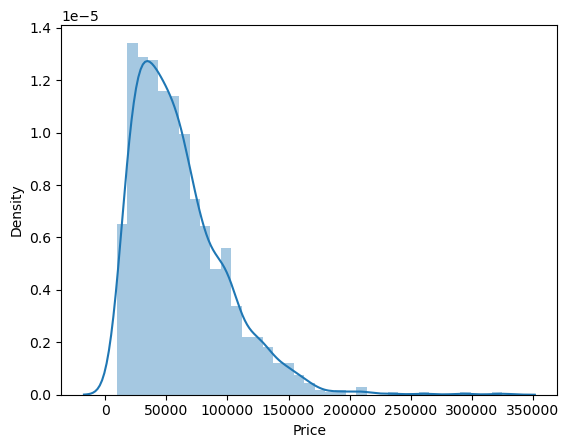

In [33]:
# Lets see the distribution of price features:
sns.distplot(df['Price'])

This shows that the price column is right-skewed. It's very common for cheaper products to be more available than expensive ones.

<Axes: xlabel='Company'>

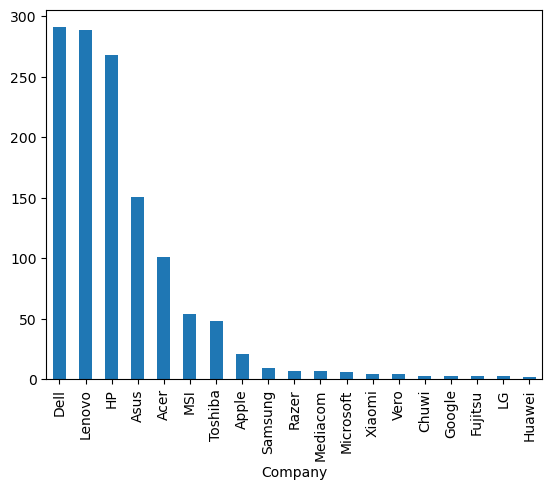

In [34]:
# Lets focus on no of company feature:
df['Company'].value_counts().plot(kind='bar')

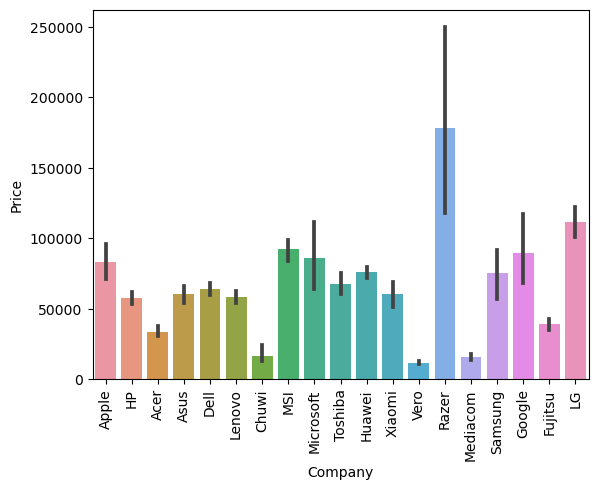

In [35]:
# Now lets see what is the avg price of each company's laptop
sns.barplot(df,x='Company',y='Price')
plt.xticks(rotation='vertical')
plt.show()

This visualization helps us understand that avg prices vary from company to company.








<Axes: xlabel='TypeName'>

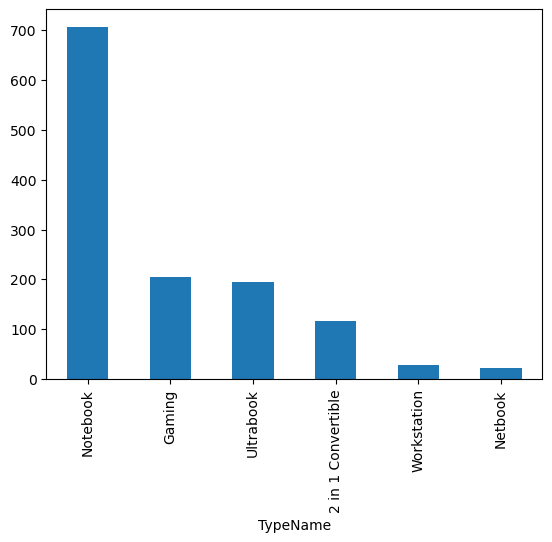

In [36]:
# Now focus on how many types of laptops are there in market:
df['TypeName'].value_counts().plot(kind='bar')

This reflect that there six type of laptops are available in the market and Notebook type of laptops have the highet market.

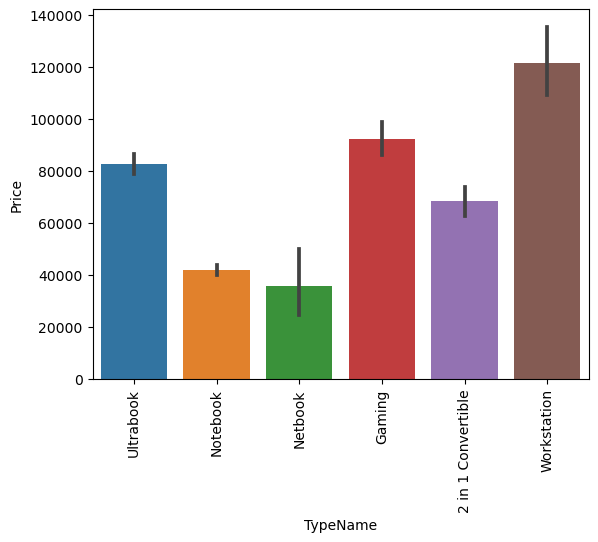

In [37]:
# Lets try to see what are the avg proce of each types of laptop:
sns.barplot(df,x='TypeName',y='Price')
plt.xticks(rotation='vertical')
plt.show()

Now we understand why Notebook has the higest market , becuse of its budget friendly price.

<Axes: xlabel='Inches'>

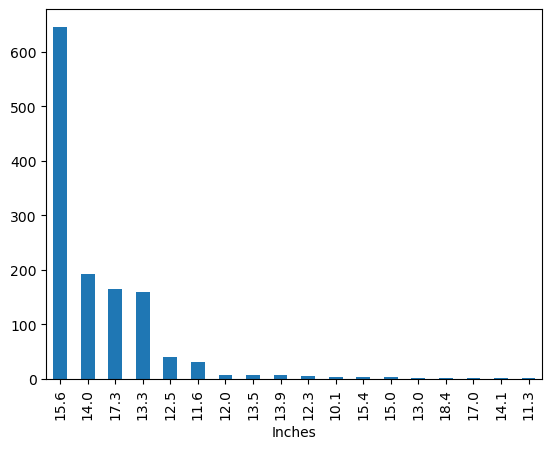

In [38]:
# Now look at the laptop screensize column(i.e inches column):
df['Inches'].value_counts().plot(kind='bar')

And it clearly shows that 15.6-inch laptops are the most common. 

In [39]:
# Feature engineering on  ScreenResolution column:

In [40]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

From the 'ScreenResolution' column, we can extract the following features: 'Touchscreen', 'IPS Panel', 'Resolution', 'Full HD', '4K Display', etc. We will then analyze whether these features significantly affect laptop prices. If there is a significant difference in prices based on the presence or absence of these features, we will retain them for further analysis.

In [41]:
list=[]
for i in  df['ScreenResolution']:
    list.append(i.split(' ')[-1])

In [42]:
df['Resolution']=list

In [43]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price,Resolution
170,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,71874,2160x1440
829,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,32980,1920x1080


<Axes: xlabel='Resolution'>

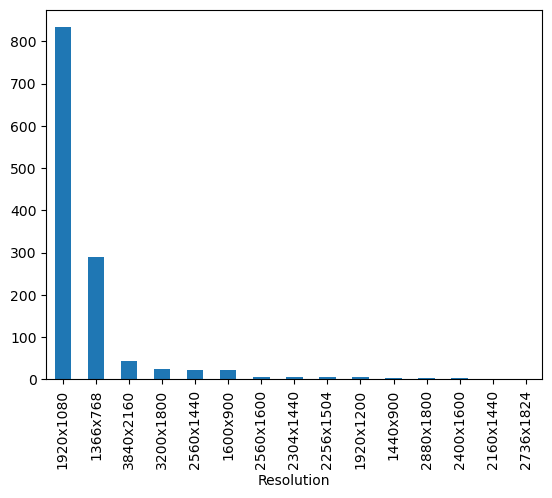

In [44]:
# Hw many different types of screen resolution are available:
df['Resolution'].value_counts().plot(kind='bar')

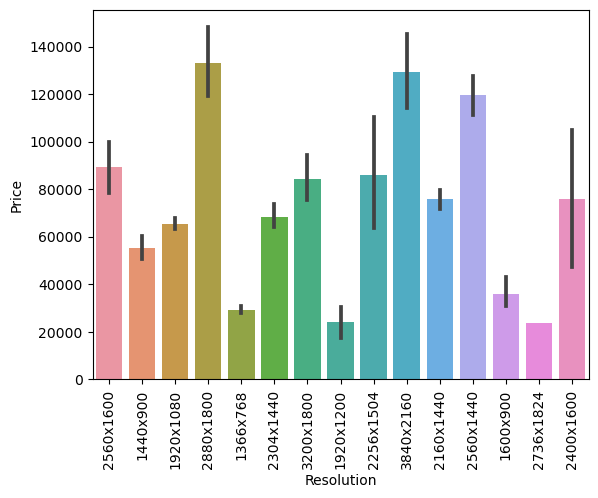

In [45]:
sns.barplot(y=df['Price'],x=df['Resolution'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# Lets focus on the touch screen feature:

In [47]:
df['Touch_screen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [48]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price,Resolution,Touch_screen
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498,1920x1080,0
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980,1366x768,0


<Axes: xlabel='Touch_screen'>

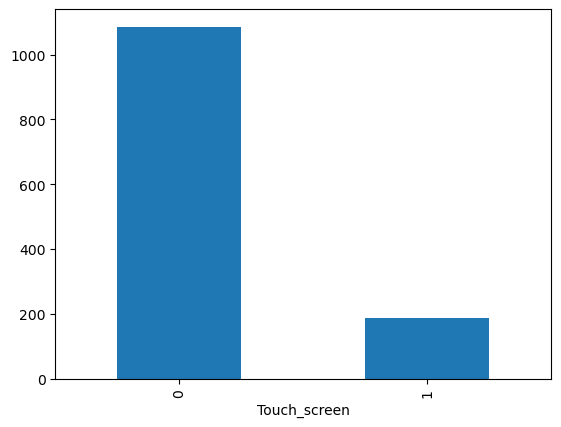

In [49]:
df['Touch_screen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touch_screen', ylabel='Price'>

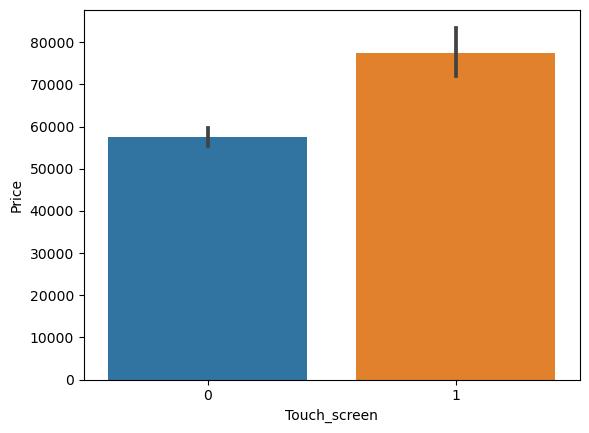

In [50]:
# Comapre the price with touchscreen column:
sns.barplot(x=df['Touch_screen'],y=df['Price'])

In [51]:
# IPS panel feature:

In [52]:
df['IPS_panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPS_panel'>

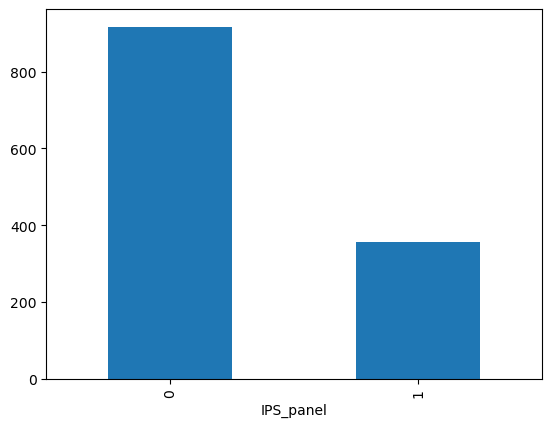

In [53]:
df['IPS_panel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS_panel', ylabel='Price'>

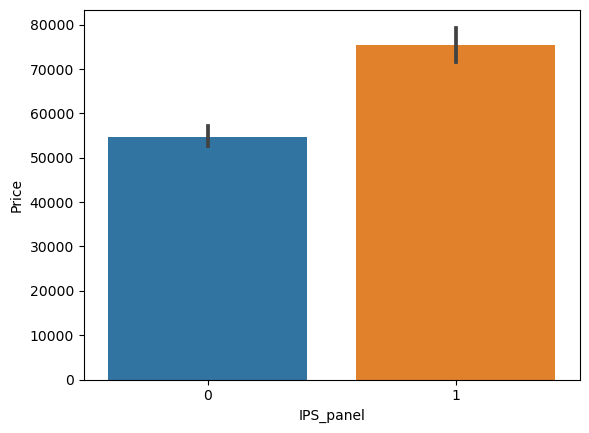

In [54]:
sns.barplot(x=df['IPS_panel'],y=df['Price'])

In [55]:
# craet a feature 4k_display
df['4k_display'] = df['ScreenResolution'].apply(lambda x: 1 if '4K' in x else 0)

<Axes: xlabel='4k_display'>

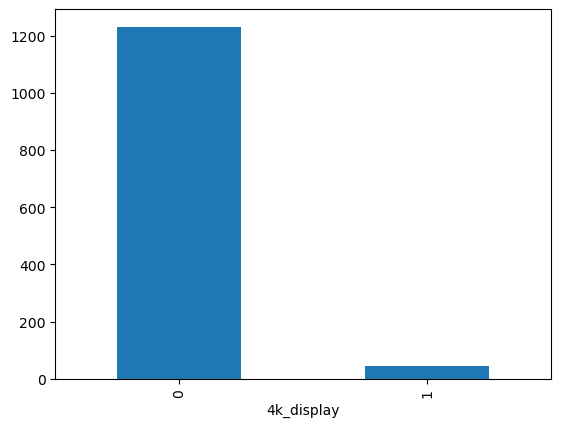

In [56]:
df['4k_display'].value_counts().plot(kind='bar')

In [57]:
# compare the price with 4k_ display column:

<Axes: xlabel='4k_display', ylabel='Price'>

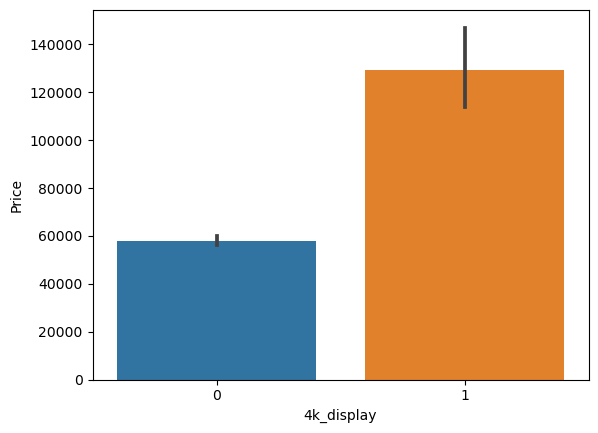

In [58]:
sns.barplot(x=df['4k_display'],y=df['Price'])

In [59]:
# creat a full hd feature:

In [60]:
df['full_hd'] = df['ScreenResolution'].apply(lambda x: 1 if 'Full HD' in x else 0)

<Axes: xlabel='full_hd'>

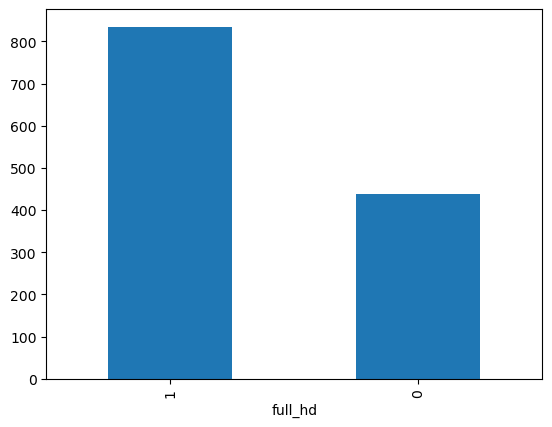

In [61]:
df['full_hd'].value_counts().plot(kind='bar')

<Axes: xlabel='full_hd', ylabel='Price'>

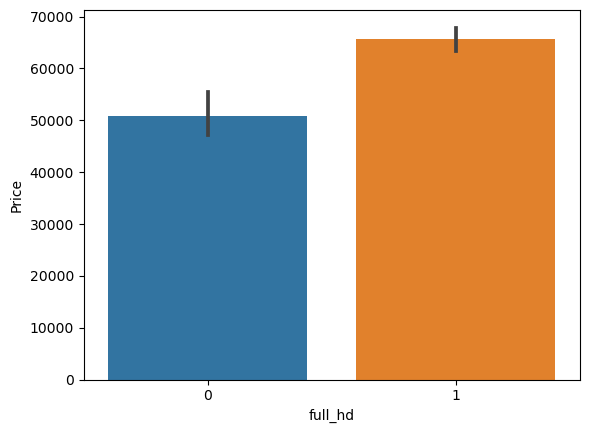

In [62]:
sns.barplot(x=df['full_hd'],y=df['Price'])

In [63]:
list=df['Resolution'].str.split('x')
list

0       [2560, 1600]
1        [1440, 900]
2       [1920, 1080]
3       [2880, 1800]
4       [2560, 1600]
            ...     
1269     [1366, 768]
1270    [1920, 1080]
1271    [3200, 1800]
1272     [1366, 768]
1273     [1366, 768]
Name: Resolution, Length: 1274, dtype: object

In [64]:
x_res=[]
y_res=[]
for i in range(1274):
    x_res.append(list[i][0])
    y_res.append(list[i][1])

In [65]:
df['x_resolution']=x_res
df['y_resolution']=y_res

In [66]:
df['x_resolution']=df['x_resolution'].astype('int')
df['y_resolution']=df['y_resolution'].astype('int')

In [67]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price,Resolution,Touch_screen,IPS_panel,4k_display,full_hd,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,2560x1600,0,1,0,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,1440x900,0,0,0,0,1440,900


### Creat a new feauture PPI using the screen size(inch), x and y resolution:

PPI stands for "Pixels Per Inch." It is a measurement of the pixel density of a display screen, indicating how many pixels are present per inch of the display. A higher PPI value means a higher pixel density, which generally results in sharper and clearer images and text on the screen.

In [68]:
df['ppi']=((((df['x_resolution'])**2)+((df['y_resolution'])**2))**0.5)/df['Inches']

#### Compute the correlation between the 'Price' column and several other columns,

In [69]:
columns = ['Inches', 'Ram_in_GB', 'Weight_in_kg', 'Price', 'Touch_screen', 'IPS_panel', '4k_display', 'full_hd','ppi']
df_selected = df[columns]

# calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Get the correlation values of 'Price' with other columns
price_correlation = correlation_matrix['Price']

print(price_correlation)


Inches          0.066990
Ram_in_GB       0.740106
Weight_in_kg    0.212192
Price           1.000000
Touch_screen    0.188630
IPS_panel       0.250357
4k_display      0.344003
full_hd         0.188306
ppi             0.469538
Name: Price, dtype: float64


Using the correlation with the 'Price' column, it is clear that there is a strong correlation with the 'Ram_in_GB' and 'ppi' columns, a moderate correlation with the '4k_display' and 'IPS_panel' columns, and a weak correlation with the 'full_hd', 'Touch_screen', and 'Weight_in_kg' columns.

In [70]:
df.drop(columns=['ScreenResolution','Inches','x_resolution','y_resolution'],inplace=True)

In [71]:
df.head(3)

,Company,TypeName,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price,Resolution,Touch_screen,IPS_panel,4k_display,full_hd,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,2560x1600,0,1,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,1440x900,0,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,1920x1080,0,0,0,1,141.211998


### CPU column:

In [72]:
l=[]
for i in df['Cpu']:
    l.append(i.split(' ')[-1].replace('GHz',''))

In [73]:
df['clock_speed_in_GHz']=l

In [74]:
df['clock_speed_in_GHz']=df['clock_speed_in_GHz'].astype('float')

In [75]:
columns = ['clock_speed_in_GHz','Price']
df_selected = df[columns]

# calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Get the correlation values of 'Price' with other columns
price_correlation = correlation_matrix['Price']

print(price_correlation)


clock_speed_in_GHz    0.428178
Price                 1.000000
Name: Price, dtype: float64


Clock speed of the processor has strong correlation with laptop price.

#### Catagorized the whole cpu column in the following parts : 'intel core i7/i5/i3','other intel','AMD'. 

In [76]:
df['Cpu_type']=df['Cpu'].apply(lambda x: ' '.join(x.split(" ")[0:3] ))

In [77]:
def processor(text):
    if text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    elif text.split(' ')[0]=='Intel':
        return 'other intel processor'
    elif text.split(' ')[0]=='AMD':
        return 'AMD Processor' 

In [78]:
df['Cpu_type']=df['Cpu_type'].apply(processor)

<Axes: xlabel='Cpu_type'>

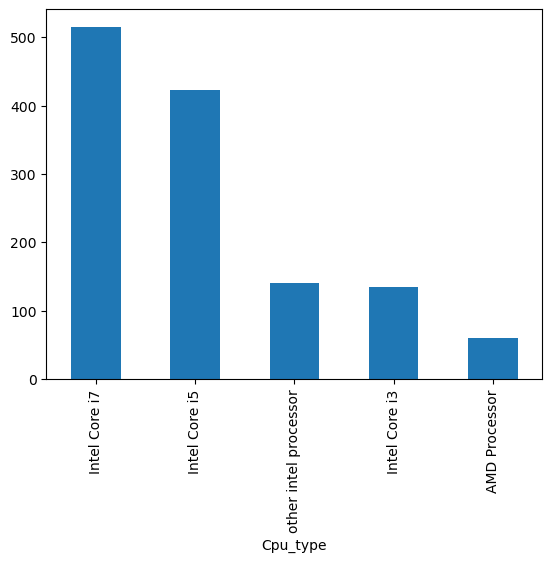

In [79]:
df['Cpu_type'].value_counts().plot(kind='bar')

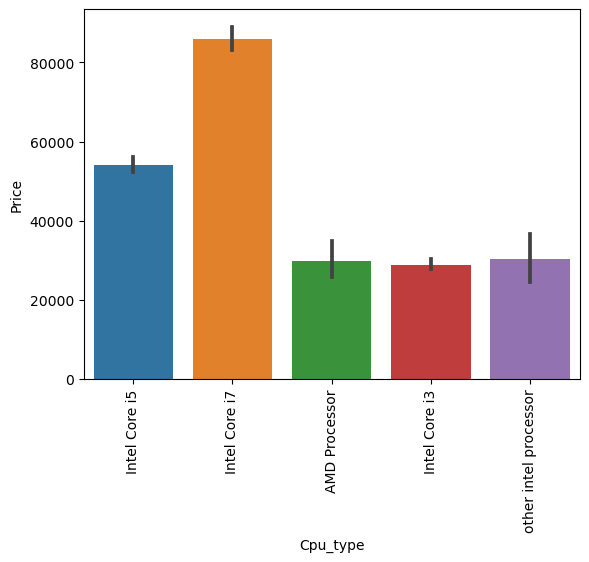

In [80]:
sns.barplot(x=df['Cpu_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
df.drop(columns=['Cpu','Resolution'],inplace=True)

In [82]:
df.head(2)

,Company,TypeName,Ram_in_GB,Memory,Gpu,OpSys,Weight_in_kg,Price,Touch_screen,IPS_panel,4k_display,full_hd,ppi,clock_speed_in_GHz,Cpu_type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,0,0,226.983005,2.3,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,0,0,127.677940,1.8,Intel Core i5


### Memory column:

In [83]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

Create 4 columns HDD, SSD, Hybrid,Flash storage from the memory column.

In [84]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '')
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", expand = True)

df['first']=new[0]
df['second']=new[1]

df['layer1_hdd']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer1_ssd']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer1_Hybrid']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer1_Flash Storage']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['first']=df['first'].str.replace('HDD','')
df['first']=df['first'].str.replace('SSD','')
df['first']=df['first'].str.replace('Hybrid','')
df['first']=df['first'].str.replace('Flash Storage','')

df['second'].isnull().sum()
df['second'].fillna('0',inplace=True)
df['second'].isnull().sum()

df['layer2_hdd']=df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer2_ssd']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer2_Hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer2_Flash Storage']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['second']=df['second'].str.replace('HDD','')
df['second']=df['second'].str.replace('SSD','')
df['second']=df['second'].str.replace('Hybrid','')
df['second']=df['second'].str.replace('Flash Storage','')

df['first']=df['first'].astype('float')
df['second']=df['second'].astype('float')

df['HDD']=(df['first']*df['layer1_hdd'])+(df['second']*df['layer2_hdd'])
df['SSD']=(df['first']*df['layer1_ssd'])+(df['second']*df['layer2_ssd'])
df['Hybrid']=(df['first']*df['layer1_Hybrid'])+(df['second']*df['layer2_Hybrid'])
df['Flash Storage']=(df['first']*df['layer1_Flash Storage'])+(df['second']*df['layer2_Flash Storage'])

df.drop(columns=['first','second','layer1_hdd','layer1_ssd','layer1_Hybrid',
                 'layer1_Flash Storage','layer2_hdd','layer2_ssd','layer2_Hybrid','layer2_Flash Storage','Memory'],inplace=True)


### GPU

In [85]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [86]:
df['gpu brand']=df['Gpu'].apply(lambda x: x.split(' ')[0])

In [87]:
df.drop(columns=['Gpu','Flash Storage','Hybrid'],inplace=True)

<Axes: xlabel='gpu brand', ylabel='Price'>

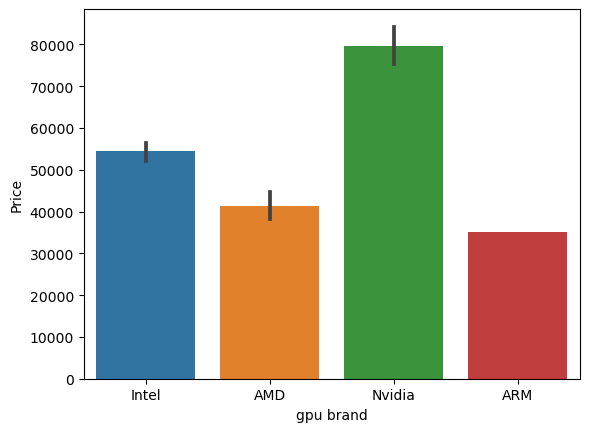

In [88]:
sns.barplot(x=df['gpu brand'], y=df['Price'])

In [89]:
df.head(2)

,Company,TypeName,Ram_in_GB,OpSys,Weight_in_kg,Price,Touch_screen,IPS_panel,4k_display,full_hd,ppi,clock_speed_in_GHz,Cpu_type,HDD,SSD,gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,0,0,226.983005,2.3,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,0,0,127.677940,1.8,Intel Core i5,0.0,0.0,Intel


## OpSys:

In [90]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

create three catagories windows , mac and others

In [91]:
def operating_system(text):
    if text =='Windows 10 ' or text=='Windows 7' or text =='Windows 10 S' :
        return 'windows'
    elif text=='macOS' or text =='Mac OS X' :
        return 'Mac'
    else:
        return 'Others'


In [92]:
df['operating system']=df['OpSys'].apply(operating_system)

In [93]:
df.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='operating system', ylabel='Price'>

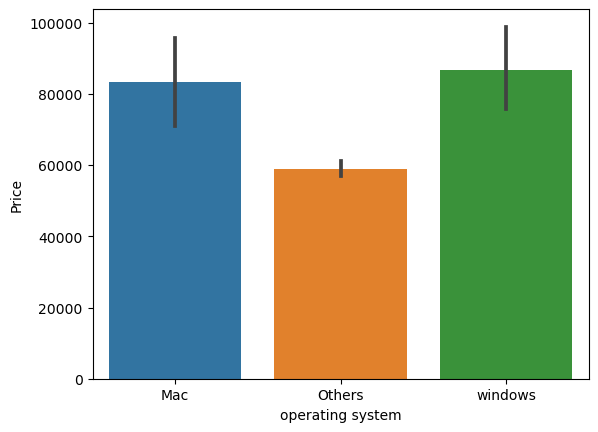

In [94]:
sns.barplot(x=df['operating system'],y=df['Price'])

## Target Column price:

C:\Users\Tirtha Ghosh\AppData\Local\Temp\ipykernel_17968\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\Tirtha Ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

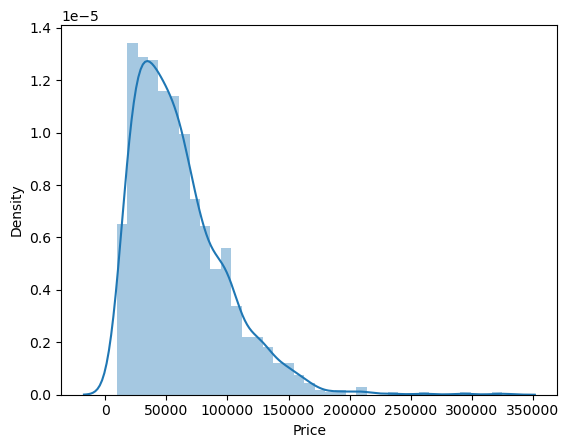

In [95]:
sns.distplot(df['Price'])

This price column is right skewed. So, we use box-cox trnasformation to make it normal distribution.

C:\Users\Tirtha Ghosh\AppData\Local\Temp\ipykernel_17968\956725316.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data)
C:\Users\Tirtha Ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


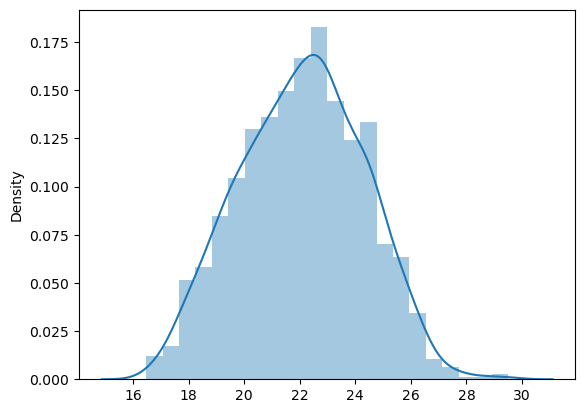

Skew value -0.011577953748405378


In [96]:
y=df['Price']
transformed_data, best_lambda = stats.boxcox(y)

sns.distplot(transformed_data)
skewness_value = skew(transformed_data)
plt.show()
print('Skew value',skewness_value)

## Transform target column :

In [97]:
X=df.drop(columns=['Price'])
Y, best_lambda = stats.boxcox(df['Price'])

In [133]:
best_lambda

0.11840251956086785

In [98]:
X.head(2)

,Company,TypeName,Ram_in_GB,Weight_in_kg,Touch_screen,IPS_panel,4k_display,full_hd,ppi,clock_speed_in_GHz,Cpu_type,HDD,SSD,gpu brand,operating system
0,Apple,Ultrabook,8,1.37,0,1,0,0,226.983005,2.3,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,0,0,127.677940,1.8,Intel Core i5,0.0,0.0,Intel,Mac


## Model Testing:

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [100]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=2,test_size=0.15)


# Linear Regression:

In [102]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))


r2_score : 0.804324459396025
MAE : 0.7568830399718678


## Lasso Regression:

In [103]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.001))
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))


r2_score : 0.7998539812947839
MAE : 0.7646376747720046


## Decision Tree :

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=8))
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))



r2_score : 0.7957274721626955
MAE : 0.7378913219080925


## Random Forest :

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',RandomForestRegressor(n_estimators=50,
                         max_depth=14,
                         random_state=3        
                        ))
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))



r2_score : 0.8761310487164824
MAE : 0.588418676483886


## SVM Regression:

In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',SVR())
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))



r2_score : 0.8161942513053666
MAE : 0.7344934783309204


## XGBoost:

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[0,1,10,13,14]),
        ('scaler', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)  # Apply scaling to numeric columns
    ],
    remainder='passthrough'
)


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',XGBRegressor(n_estimators=200,
                   max_depth=7,
                   learning_rate=0.05))
])



pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2_score :', r2_score(y_test, y_pred))
print('MAE :', mean_absolute_error(y_test, y_pred))



r2_score : 0.8927437882954302
MAE : 0.5463553939291461


## Exporting the model :

In [108]:
import pickle

In [109]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [135]:
np.exp(np.log(best_lambda * 21 + 1) / best_lambda)

38093.14313045147

In [136]:
best_lambda

0.11840251956086785